# Decision Tree

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import pydot
from IPython.display import Image, display
from collections import namedtuple

In [2]:
# If it complains about pydot.
# do this only once then comment it back
# try:
#     from pip import main as pipmain
# except:
#     from pip._internal import main as pipmain
# pipmain(['install', 'pydot'])


In [9]:
#if you are on a mac you may also need this
# http://brewformulas.org/Graphviz
#!brew install graphviz

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
asuka                      flamegraph                 lizard-analyzer
cassowary                  flarectl                   oha
cddlib                     fplll                      openfast
cdo                        gau                        openstackclient
claws-mail                 ghc@8.8                    pfetch
clip                       ghz                        qrcp
cloud-nuke                 ghz-web                    rbtools
code-server                gocloc                     redo
cqlkit                     graphql-cli                reorder-python-imports
cucumber-ruby              guile@2                    rtorrent
detach                     hdf5-mpi                   semgrep
dgraph                     immudb                     sollya
dmagnetic                  kamel                      spotify-tui
duckdb                     kde-extra-cmake-modules    spotifyd
duktape   


==> Downloading https://homebrew.bintray.com/bottles/libpng-1.6.37.catalina.bott
==> Downloading from https://akamai.bintray.com/c8/c8e74da602c21f978cd7ee3d48997
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/freetype-2.10.1.catalina.bo
==> Downloading from https://akamai.bintray.com/dd/ddd686141a969caec11ea248324e3
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/fontconfig-2.13.1.catalina.
==> Downloading from https://akamai.bintray.com/64/64ff208b28613dfe2a65b9d74fd9b
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/jpeg-9d.catalina.bottle.tar
==> Downloading from https://akamai.bintray.com/8f/8f7b82a952fb3937889c7f22da140
######################################################################## 100.0%
==> Downloading https://homebre

🍺  /usr/local/Cellar/fontconfig/2.13.1: 531 files, 3.4MB
==> Installing graphviz dependency: jpeg
==> Pouring jpeg-9d.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/jpeg/9d: 21 files, 775.2KB
==> Installing graphviz dependency: libtiff
==> Pouring libtiff-4.1.0.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/libtiff/4.1.0: 247 files, 3.7MB
==> Installing graphviz dependency: webp
==> Pouring webp-1.1.0.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/webp/1.1.0: 39 files, 2.1MB
==> Installing graphviz dependency: gd
==> Pouring gd-2.3.0.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/gd/2.3.0: 34 files, 1.1MB
==> Installing graphviz dependency: gettext
==> Pouring gettext-0.20.2_1.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/gettext/0.20.2_1: 1,923 files, 18.6MB
==> Installing graphviz dependency: libffi
==> Pouring libffi-3.3.catalina.bottle.tar.gz
==> Caveats
libffi is keg-only, which means it was not symlinked into /usr/local,
because macOS already provides this software and installing another versi

🍺  /usr/local/Cellar/icu4c/67.1: 258 files, 71.2MB
==> Installing graphviz dependency: harfbuzz
==> Pouring harfbuzz-2.6.6_1.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/harfbuzz/2.6.6_1: 165 files, 11.6MB
==> Installing graphviz dependency: pango
==> Pouring pango-1.44.7.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/pango/1.44.7: 62 files, 4.3MB
==> Installing graphviz
==> Pouring graphviz-2.44.0.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/graphviz/2.44.0: 508 files, 11.3MB
==> `brew cleanup` has not been run in 30 days, running now...
Removing: /Users/natthakan/Library/Caches/Homebrew/autoconf--2.69.catalina.bottle.4.tar.gz... (871.6KB)
Removing: /Users/natthakan/Library/Caches/Homebrew/gdbm--1.18.1.catalina.bottle.1.tar.gz... (196.7KB)
Removing: /usr/local/Cellar/gettext/0.20.1... (1,893 files, 18.4MB)
Removing: /Users/natthakan/Library/Caches/Homebrew/libtermkey--0.22.catalina.bottle.tar.gz... (57.9KB)
Removing: /Users/natthakan/Library/Caches/Homebrew/libtool--2.4.6_1.catalina.bottle

Let us consider the data below.

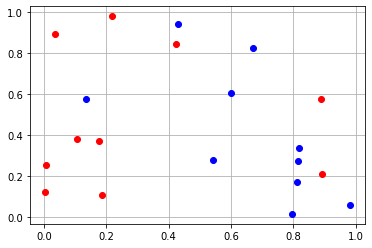

In [4]:
np.random.seed(100)
xs = np.random.random((20,2))
#print xs
cls = np.random.randint(0,2,20)*2-1
#print cls
plt.plot(xs[cls>0,0], xs[cls>0,1], 'ob')
plt.plot(xs[cls<0,0], xs[cls<0,1], 'or')
plt.grid(True)

1) Try to make a classifier with several if statements.

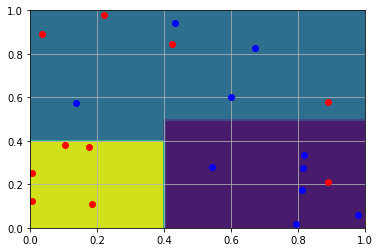

In [5]:
#return prob of being red
def bunch_of_ifs(data):
    x1, x2 = data
    if(x1 < 0.4):
        #return 7/8
        if x2 < 0.4:
            return 1
        else:
            return 1/3
    else:
        if x2 > 0.5:
            return 2/5
        else:
            return 1/7
    

x1s = np.linspace(0,1,100)
x2s = np.linspace(0,1,100)
zs = np.zeros((100,100))
for ix1, x1 in enumerate(x1s):
    for ix2, x2 in enumerate(x2s):
        zs[ix1, ix2] = bunch_of_ifs([x1, x2])
plt.contourf(x1s, x2s, zs.T)
plt.plot(xs[cls>0,0], xs[cls>0,1], 'ob')
plt.plot(xs[cls<0,0], xs[cls<0,1], 'or')
plt.grid(True)
        
    

2) We want to represent the code above with a tree. Try draw your code above with a tree.

In [6]:
#Here are some helpers
#node must have field left and right representing left and right node.
#the label on the node is from __str__ method
def visualize_tree(node, depth_limit=10):
    graph = pydot.Dot(graph_type='digraph')
    visualize_tree_helper(node, graph, 0, depth_limit=depth_limit)
    display(Image(graph.create_png()))
    return graph
    
def visualize_tree_helper(node, graph, depth, depth_limit=10):
    
    if depth > depth_limit:
        print('Traversing too deep')
        dotnode = pydot.Node('n%d'%id(node), label=str(node), shape="diamond", fillcolor="green", style="filled")
        graph.add_node(dotnode)
        return dotnode
      
    if not node.is_leaf():
        dotnode = pydot.Node('n%d'%id(node),label=str(node), shape="box")
    else:
        dotnode = pydot.Node('n%d'%id(node),label=str(node), shape="ellipse")
    graph.add_node(dotnode)
    
    if node.left is not None:
        dotleft = visualize_tree_helper(node.left, graph, depth+1, depth_limit)
        edge = pydot.Edge(dotnode, dotleft, label="Y")
        graph.add_edge(edge)
    if node.right is not None:
        dotright = visualize_tree_helper(node.right, graph, depth+1, depth_limit)
        edge = pydot.Edge(dotnode, dotright, label="N")
        graph.add_edge(edge)
    return dotnode

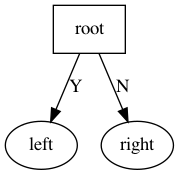

In [10]:
class Node:
    def __init__(self, msg='label'):
        self.left = None
        self.right = None
        self.msg = msg
        
    def is_leaf(self):
        return self.left is None and self.right is None
    
    def __str__(self):
        return self.msg

test_root = Node('root')
test_root.left = Node('left')
test_root.right = Node('right')
graph = visualize_tree(test_root)

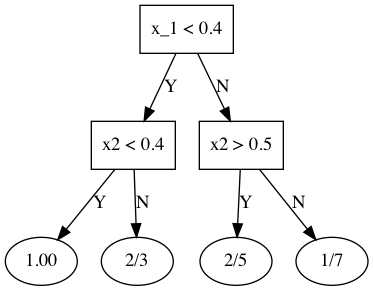

In [12]:
def bunch_of_ifs(data):
    if x1 < 0.4:
        if x2 < 0.4:
            return 1
        else:
            return 2/3
    else:
        if x2 > 0.5:
            return 2/5
        else:
            return 1/7
root = Node('x_1 < 0.4')
root.left = Node('x2 < 0.4')
root.left.left = Node('1.00')
root.left.right = Node('2/3')
root.right = Node('x2 > 0.5')
root.right.left = Node('2/5')
root.right.right = Node('1/7')
visualize_tree(root)

3) But we want our tree to be able to classify and not just draw a nice picture.

This means that 

- our tree should have a method call classify(data)
- each (decision) node should be able to make decision(Think about what info you need to do that).
- leaf node should just holds the probability.

Implement this (Subclass Node). (Debug it with visualize tree)

Note that calling super constructor in python is a bit weird: you will need to do:

``Node.__init__(self)`` within constructor

0.4
1.0


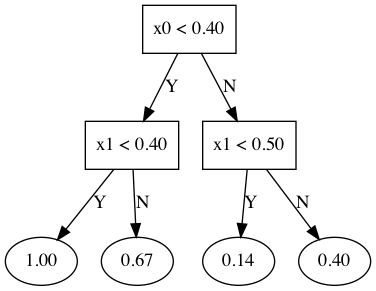

In [15]:
from typing import List
def bunch_of_ifs(data):
    if x1 < 0.4:
        if x2 < 0.4:
            return 1
        else:
            return 2/3
    else:
        if x2 > 0.5:
            return 2/5
        else:
            return 1/7
class DecisionNode(Node):
    def __init__(self, vid, cut, prob=-1.0):
        Node.__init__(self)
        self.vid = vid
        self.cut = cut
        self.prob = prob
    def classify(self, features):
        if self.is_leaf():
            return self.prob
        if features[self.vid] < self.cut:
            return self.left.classify(features)
        else:
            return self.right.classify(features)
    def __str__(self):
        if not self.is_leaf():
            return 'x%d < %.2f'%(self.vid, self.cut)
        else:
            return '%.2f'%self.prob

root = DecisionNode(0,0.4)
root.left = DecisionNode(1,0.4)
root.left.left = DecisionNode(None,None,1.)
root.left.right = DecisionNode(None,None,2/3)
root.right = DecisionNode(1,0.5)
root.right.left = DecisionNode(None,None,1/7)
root.right.right = DecisionNode(None,None,2/5)
print(root.classify([0.5, 0.5]))
print(root.classify([0.1, 0.1]))
visualize_tree(root)

4) Another way to visualize tree is by contour plot.

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf

Draw contour plot of the tree you had in 3)
<img src="contour.png"/>

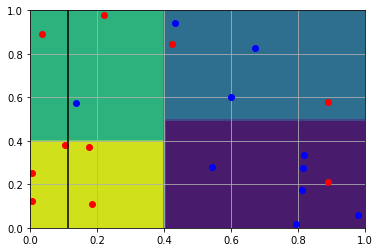

In [21]:
x1s = np.linspace(0,1,100)
x2s = np.linspace(0,1,100)
zs = np.zeros((100,100))
for ix1, x1 in enumerate(x1s):
    for ix2, x2 in enumerate(x2s):
        zs[ix1, ix2] = root.classify([x1, x2])
plt.contourf(x1s, x2s, zs.T)
plt.plot(xs[cls>0,0], xs[cls>0,1], 'ob')
plt.plot(xs[cls<0,0], xs[cls<0,1], 'or')
plt.grid(True)
plt.axvline(0.113, color='black')

Of course, we are not going to build this tree by hands. Our goal is to build a program which read the data and build a good tree. (Finding the best tree is probably NP problem.) So we are gonna go greedy here.


5) How do we pick the best split(which variable and where)? What does it mean intuitively?

0.11318574517112133

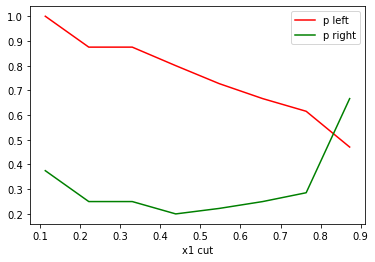

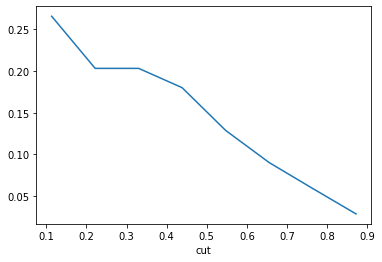

In [20]:
x1_min = np.min(xs[:,0])
x1_max = np.max(xs[:,0])
cuts = np.linspace(x1_min,x1_max,10)[1:-1]
p_left = []
p_right = []
for cut in cuts:
    x1 = xs[:,0]
    left_x1 = x1 < cut
    n_red_left = np.sum(cls[left_x1] < 0)
    n_left = len(cls[left_x1])
    p_left.append(n_red_left/n_left)
    right_x1 = ~left_x1
    n_red_right = np.sum(cls[right_x1] < 0)
    n_right = len(cls[right_x1])
    p_right.append(n_red_right/n_right)
plt.plot(cuts, p_left, 'r', label='p left')
plt.plot(cuts, p_right, 'g', label='p right')
plt.xlabel('x1 cut')
plt.legend()
score = (np.array(p_left) - 0.5)**2 + (np.array(p_right) - 0.5)**2
plt.figure()
plt.plot(cuts,score)
plt.xlabel('cut')
cuts[np.argmax(score)]

6) Write a function: given features and class and pick the best split. (Think about how we should represent split?)

7) We want to grow a decision tree we need to stop somewhere. When should we stop?

8) Now consider this data. Write a function that grow decision tree. Of course, you will need to 

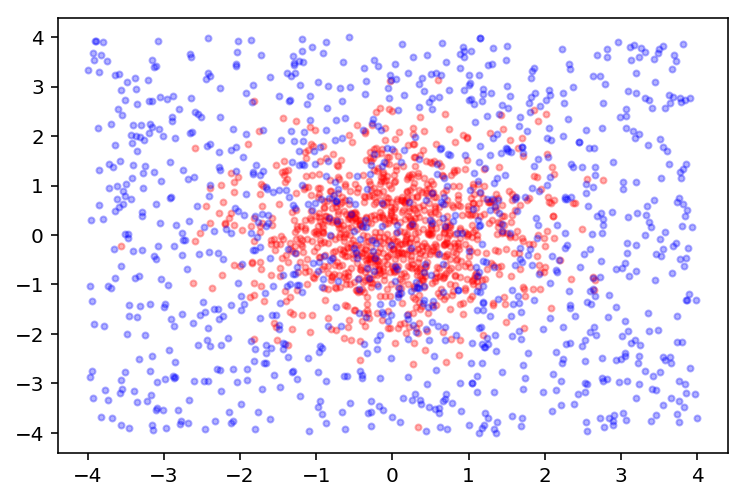

In [22]:
np.random.seed(1234)
xp1 = np.random.randn(1000,1)
xp2 = np.random.randn(1000,1)
pcls = np.zeros((1000))
pcls[:] = 1
xn1 = np.random.random((1000,1))*8-4
xn2 = np.random.random((1000,1))*8-4
ncls = np.zeros((1000))
ncls[:] = -1
x1s = np.concatenate([xp1, xn1])
x2s = np.concatenate([xp2, xn2])
cls = np.concatenate([pcls, ncls])
features = np.concatenate((x1s, x2s), axis=1)

cls>0
plt.plot(features[cls>0, 0], features[cls>0, 1], '.r', alpha=0.3)
plt.plot(features[cls<0, 0], features[cls<0, 1], '.b', alpha=0.3)

In [ ]:
def make_leaf(data, cls) -> DecisionNode:
    n_red = data[cls<0]
    total = len(data)
    return DecisionNode(None, None, n_red/total)

def find_best_cut(data, cls) -> DecisionNode:
    n_var = len(data[0])
    best_score = 0
    best_vid = 0
    best_cut = 0
    first = True
    for vid in range(n_var):
        feat = data[:, vid]
        cuts = np.linspace(np.min(feat), np.max(feat), 10)[1:-1]
        for cut in cuts:
            score = compute_score(data, cls, vid, cut)
            if first or score > best_score:
                first = False
                best_score = score
                best_vid = best_vid
                best_cut = cut
    return DecisionNode(best_vid, best_cut)
    
def compute_score(data, cls, vid, cut) -> float:
    dl, cl, dr, cr = split_data(data, cls, vid, cut)
    def one_side_score(data, cls):
        n_red = np.sum(cls<0)
        total_n = len(cl)
        p_red = n_red/total_n
        return (p_red-0.5)**2
    return one_side_score(dl, cl) + one_side_score(dr, cr)
    
def split_data(data, cls, vid, cut) -> 'data_left, cls_left, data_right, cls_right':
    left_mask = data[:, vid] < cut
    right_mask = ~left_mask
    return data[left_mask], cls[left_mask], data[right_mask], cls[right_mask]

def make_decision_tree(data,cls,min_leaf_size = 5):
    if (len(data) <= min_leaf_size): #sould terminate
        return make_leaf(data,cls) #return leaf
    # find best cut
    this_node = find_best_cut(data,cls)
    # get left and right data
    dl,cl,dr,cr = split_data(data,cls,this_node.vid,this_node.cut)
    # left = tree your friend made with left data
    this_node.left = make_decision_tree(dl,cl,min_leaf_size)
    # right = tree your friend made with right data
    this_node.right = make_decision_tree(dr,cr,min_leaf_size)
    # connect them
    # done!
    return this_node
    

9) Visualize what you build with contour plot. What do you see? Why do you think that happen?

<img src="contour2.png"/>

10) What is the advantage of this method over stuff like linear regression?

11) What happen if minleaf is too small?

# k-Nearest Neighborhood

In [23]:
#implement and make contour plot

# Quick Non Linear Logistic

1) Try logistic regression with (How do I know that we need this transformation?)
$$(x_1, x_2) \to (1, x_1,x_1^2,x_2, x_2^2, x_1x_2)$$

# ROC

1) Easiest way to visualize them is ROC. Plot it (write your own first). Then use the library for the rest of your life.